In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import pycountry_convert as pc
from pprint import pprint
from typing import Tuple
from tqdm import tqdm
tqdm.pandas()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df, df2, df3 = pd.read_csv('time_series_covid19_confirmed_global.csv'), pd.read_csv('time_series_covid19_deaths_global.csv'), pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [4]:
df2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [5]:
df3

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
lat_long = df.groupby('Country/Region')[['Lat', 'Long']].median()
can_lat, can_lon, chi_lat, chi_lon = lat_long.query("index == 'Canada'")['Lat'].iloc[0], lat_long.query("index == 'Canada'")['Long'].iloc[0], lat_long.query("index == 'China'")['Lat'].iloc[0], lat_long.query("index == 'China'")['Long'].iloc[0]
can_lat, can_lon, chi_lat, chi_lon

(52.9399, -83.1076, 31.8257, 113.55)

In [10]:
df.loc[df['Province/State'] == 'Repatriated Travellers', 'Lat'] = can_lat
df.loc[df['Province/State'] == 'Repatriated Travellers', 'Long'] = can_lon

df.loc[df['Province/State'] == 'Unknown', 'Lat'] = chi_lat
df.loc[df['Province/State'] == 'Unknown', 'Long'] = chi_lon

In [11]:
df['Province/State'] = df['Province/State'].fillna('Unknown')

In [69]:
removed = df[(df['Lat']==0.0) | (df['Country/Region']=='Antarctica') | (df['Country/Region']=='Kiribati') 
             | (df['Country/Region']=='Micronesia') | (df['Country/Region']=='Tuvalu') 
            | (df['Country/Region']=='Holy See') | (df['Country/Region']=='Timor-Leste') 
           | (df['Province/State']=='French Polynesia') | (df['Province/State']=='Pitcairn Islands')].reset_index(drop=True) 
removed 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Unknown,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
1,Diamond Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grand Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
3,Unknown,Diamond Princess,0.000000,0.000000,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
4,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,77957,77957,77957,77957,77957,77957,77957,77957,78055,78055
5,Unknown,Holy See,41.902900,12.453400,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
6,Unknown,Kiribati,-3.370400,-168.734000,0,0,0,0,0,0,...,5013,5013,5013,5013,5013,5013,5013,5013,5014,5014
7,Unknown,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
8,Unknown,Micronesia,7.425600,150.550800,0,0,0,0,0,0,...,23671,23948,23948,23948,23948,23948,23948,23948,23948,23948
9,Unknown,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,23418,23418,23418,23418,23418,23418,23418,23418,23419,23419


In [29]:
selected = df[~((df['Lat']==0.0) | (df['Country/Region']=='Antarctica') | (df['Country/Region']=='Kiribati') 
             | (df['Country/Region']=='Micronesia') | (df['Country/Region']=='Tuvalu') 
            | (df['Country/Region']=='Holy See') | (df['Country/Region']=='Timor-Leste') 
           | (df['Province/State']=='French Polynesia') | (df['Province/State']=='Pitcairn Islands'))].reset_index(drop=True) 
selected 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
273,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
274,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
275,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [34]:
def get_continent_name(continent_code: str) -> str:
    continent_dict = {
        "NA": "North America",
        "SA": "South America",
        "AS": "Asia",
        "AF": "Africa",
        "OC": "Oceania",
        "EU": "Europe",
        "AQ" : "Antarctica"
    }
    return continent_dict[continent_code]

def get_continent(lat: float, lon:float) -> Tuple[str, str]:
    geolocator = Nominatim(user_agent="<forme@gmail.com", timeout=10)
    geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

    location = geocode(f"{lat}, {lon}", language="en")

    # for cases where the location is not found, coordinates are antarctica
    if location is None:
        return "Antarctica", "Antarctica"

    # extract country code
    address = location.raw["address"]
    country_code = address["country_code"].upper()
    
    # get continent code from country code
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continent_name = get_continent_name(continent_code)
    
    return continent_name #country_name, 

In [39]:
for ind, row in selected.iterrows():
    selected.loc[ind, 'Continent'] = get_continent(row['Lat'], row['Long'])
selected

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Continent
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,Asia
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,Europe
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,Africa
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,Europe
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,Asia
273,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,Asia
274,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,Asia
275,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,Africa


In [70]:
removed['Country/Region'] = removed['Country/Region'].replace('Diamond Princess', 'Canada')
removed.iloc[3, removed.columns.get_loc('Province/State')] = 'Diamond Princess'
removed = removed.drop([1]).reset_index(drop=True)

In [45]:
removed['Country/Region'].unique()

array(['Antarctica', 'Canada', 'Diamond Princess', 'France', 'Holy See',
       'Kiribati', 'MS Zaandam', 'Micronesia', 'Timor-Leste', 'Tuvalu',
       'United Kingdom'], dtype=object)

In [72]:
continent = {'Antarctica':'Antarctica', 'Canada':'North America', 'France':'Europe', 'Holy See':'Europe', 'Kiribati':'Oceania', 
            'MS Zaandam':'North America', 'Micronesia':'Oceania', 'Timor-Leste':'Asia', 'Tuvalu':'Oceania', 'United Kingdom':'Europe'}

#df['Continent'] = df['data'].apply(lambda x: x['age']*2)
removed['Continent'] = removed['Country/Region'].map(continent)

In [73]:
removed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Continent
0,Unknown,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,Antarctica
1,Grand Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,North America
2,Diamond Princess,Canada,0.000000,0.000000,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,North America
3,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,77957,77957,77957,77957,77957,77957,77957,78055,78055,Europe
4,Unknown,Holy See,41.902900,12.453400,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,Europe
5,Unknown,Kiribati,-3.370400,-168.734000,0,0,0,0,0,0,...,5013,5013,5013,5013,5013,5013,5013,5014,5014,Oceania
6,Unknown,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,North America
7,Unknown,Micronesia,7.425600,150.550800,0,0,0,0,0,0,...,23948,23948,23948,23948,23948,23948,23948,23948,23948,Oceania
8,Unknown,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,23418,23418,23418,23418,23418,23418,23418,23419,23419,Asia
9,Unknown,Tuvalu,-7.109500,177.649300,0,0,0,0,0,0,...,2805,2805,2805,2805,2805,2805,2805,2805,2805,Oceania


In [176]:
copy_df = pd.concat([selected, removed], axis=0).sort_values(by=['Country/Region', 'Province/State']).reset_index(drop=True)
copy_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Continent
0,Unknown,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,Asia
1,Unknown,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,Europe
2,Unknown,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,Africa
3,Unknown,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,Europe
4,Unknown,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Unknown,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,Asia
284,Unknown,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,Asia
285,Unknown,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,Asia
286,Unknown,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,Africa


In [163]:
copy_df2 = df2.copy()

In [164]:
copy_df2['Country/Region'] = copy_df2['Country/Region'].replace('Diamond Princess', 'Canada')
copy_df2.iloc[106, copy_df2.columns.get_loc('Province/State')] = 'Diamond Princess'
copy_df2 = copy_df2.drop([42]).reset_index(drop=True)
copy_df2['Province/State'] = copy_df2['Province/State'].fillna('Unknown')

In [165]:
copy_df2 = copy_df2.sort_values(by=['Country/Region', 'Province/State']).reset_index(drop=True)

In [181]:
confirmed = pd.melt(copy_df, id_vars=['Province/State', 'Country/Region', 'Continent', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
confirmed

,Province/State,Country/Region,Continent,Lat,Long,Date,Confirmed
0,Unknown,Afghanistan,Asia,33.939110,67.709953,1/22/20,0
1,Unknown,Albania,Europe,41.153300,20.168300,1/22/20,0
2,Unknown,Algeria,Africa,28.033900,1.659600,1/22/20,0
3,Unknown,Andorra,Europe,42.506300,1.521800,1/22/20,0
4,Unknown,Angola,Africa,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...,...
329179,Unknown,West Bank and Gaza,Asia,31.952200,35.233200,3/9/23,703228
329180,Unknown,Winter Olympics 2022,Asia,39.904200,116.407400,3/9/23,535
329181,Unknown,Yemen,Asia,15.552727,48.516388,3/9/23,11945
329182,Unknown,Zambia,Africa,-13.133897,27.849332,3/9/23,343135


In [183]:
deaths = pd.melt(copy_df2, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
deaths

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,Unknown,Afghanistan,33.939110,67.709953,1/22/20,0
1,Unknown,Albania,41.153300,20.168300,1/22/20,0
2,Unknown,Algeria,28.033900,1.659600,1/22/20,0
3,Unknown,Andorra,42.506300,1.521800,1/22/20,0
4,Unknown,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
329179,Unknown,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
329180,Unknown,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
329181,Unknown,Yemen,15.552727,48.516388,3/9/23,2159
329182,Unknown,Zambia,-13.133897,27.849332,3/9/23,4057


In [184]:
confirmed['Deaths'] = deaths['Deaths']
confirmed['Date'] = confirmed['Date'].astype('datetime64[ns]')
confirmed['Day'], confirmed['Month'], confirmed['Year'] = confirmed['Date'].dt.day, confirmed['Date'].dt.month, confirmed['Date'].dt.year

In [3]:
confirmed = pd.read_csv('confirmed.csv')
confirmed

,Province/State,Country/Region,Continent,Lat,Long,Date,Confirmed,Deaths,Day,Month,Year
0,Unknown,Afghanistan,Asia,33.939110,67.709953,2020-01-22,0,0,22,1,2020
1,Unknown,Albania,Europe,41.153300,20.168300,2020-01-22,0,0,22,1,2020
2,Unknown,Algeria,Africa,28.033900,1.659600,2020-01-22,0,0,22,1,2020
3,Unknown,Andorra,Europe,42.506300,1.521800,2020-01-22,0,0,22,1,2020
4,Unknown,Angola,Africa,-11.202700,17.873900,2020-01-22,0,0,22,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
329179,Unknown,West Bank and Gaza,Asia,31.952200,35.233200,2023-03-09,703228,5708,9,3,2023
329180,Unknown,Winter Olympics 2022,Asia,39.904200,116.407400,2023-03-09,535,0,9,3,2023
329181,Unknown,Yemen,Asia,15.552727,48.516388,2023-03-09,11945,2159,9,3,2023
329182,Unknown,Zambia,Africa,-13.133897,27.849332,2023-03-09,343135,4057,9,3,2023


In [7]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329184 entries, 0 to 329183
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  329184 non-null  object 
 1   Country/Region  329184 non-null  object 
 2   Continent       329184 non-null  object 
 3   Lat             329184 non-null  float64
 4   Long            329184 non-null  float64
 5   Date            329184 non-null  object 
 6   Confirmed       329184 non-null  int64  
 7   Deaths          329184 non-null  int64  
 8   Day             329184 non-null  int64  
 9   Month           329184 non-null  int64  
 10  Year            329184 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 27.6+ MB


In [26]:
group = confirmed.groupby(['Continent', 'Country/Region'])[['Confirmed', 'Deaths']].mean().reset_index()
group = group.sort_values(by=['Continent', 'Confirmed', 'Deaths'], ascending=[True, False, False])
cont = group.groupby('Continent')[['Confirmed', 'Deaths']].mean().sort_values(by=['Confirmed', 'Deaths'], ascending=[False, False])
cont

,Confirmed,Deaths
Continent,,
South America,2.585778e+06,64197.523925
North America,2.066093e+06,33881.676229
Asia,1.615714e+06,16557.109470
Europe,1.563999e+06,20065.238229
Africa,1.224593e+05,2763.474700
Oceania,4.566137e+04,114.039037
Antarctica,4.340332e+00,0.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'Antarctica')])

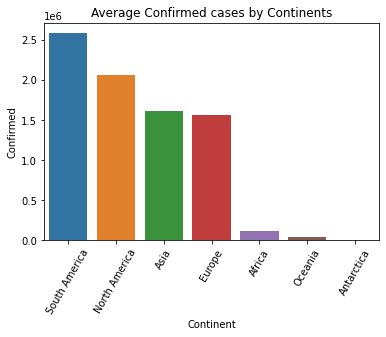

In [6]:
sns.barplot(x=cont.index, y='Confirmed', data=cont)
plt.title('Average Confirmed cases by Continents')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Africa'),
  Text(5, 0, 'Oceania'),
  Text(6, 0, 'Antarctica')])

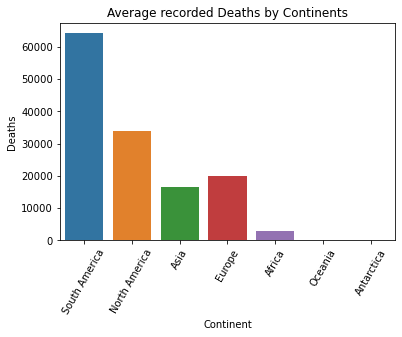

In [7]:
sns.barplot(x=cont.index, y='Deaths', data=cont)
plt.title('Average recorded Deaths by Continents')
plt.xticks(rotation=60)

In [25]:
group_t5 = group.groupby('Continent').head(5).sort_values(by=['Continent', 'Confirmed', 'Deaths'], ascending=[True, False, False]).reset_index(drop=True)
group_t5

,Continent,Country/Region,Confirmed,Deaths
0,Africa,South Africa,2.286176e+06,62144.395451
1,Africa,Morocco,7.024983e+05,10050.356080
2,Africa,Tunisia,5.637859e+05,16271.569554
3,Africa,Egypt,2.927392e+05,15090.937008
4,Africa,Ethiopia,2.810616e+05,4405.528434
5,Antarctica,Antarctica,4.340332e+00,0.000000
6,Asia,India,2.548654e+07,319266.174103
7,Asia,Turkey,7.734683e+06,54950.755906
8,Asia,"Korea, South",7.408477e+06,9817.051619
9,Asia,Japan,6.420133e+06,19572.876640


Text(0.5, 1.0, 'Top 5 Countries with high Confirmed cases: Oceania')

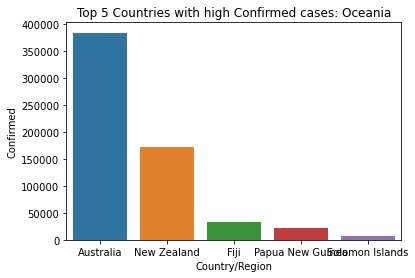

In [38]:
check = group_t5[group_t5['Continent']=='Oceania']
sns.barplot(x='Country/Region', y='Confirmed', data=check)
plt.title('Top 5 Countries with high Confirmed cases: Oceania')

Text(0.5, 1.0, 'Trend of Confirmed cases globally')

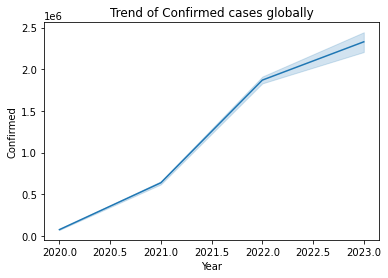

In [39]:
sns.lineplot(x='Year', y='Confirmed', data=confirmed)
plt.title('Trend of Confirmed cases globally')

Text(0.5, 1.0, 'Trend of Deaths globally')

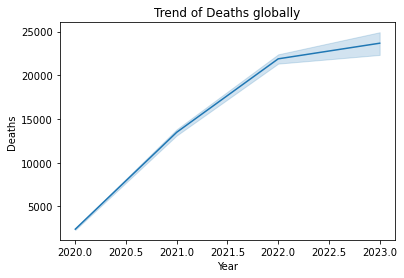

In [40]:
sns.lineplot(x='Year', y='Deaths', data=confirmed)
plt.title('Trend of Deaths globally')

In [42]:
con = [ 'Asia', 'Europe', 'North America', 'South America']
con_lin = ['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
con_other = ['Africa', 'Antarctica', 'Oceania']

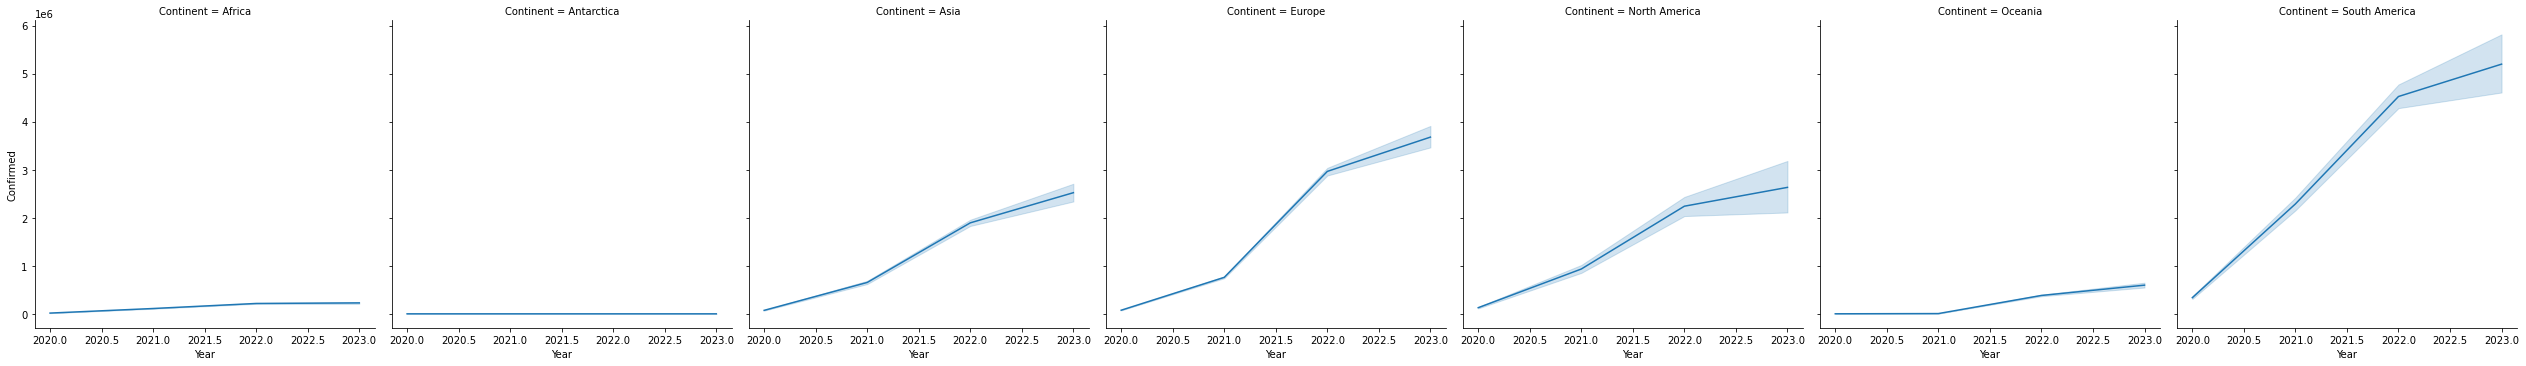

In [15]:
sns.relplot(x='Year', y='Confirmed', col='Continent', kind='line', col_order=con_lin, data=confirmed)

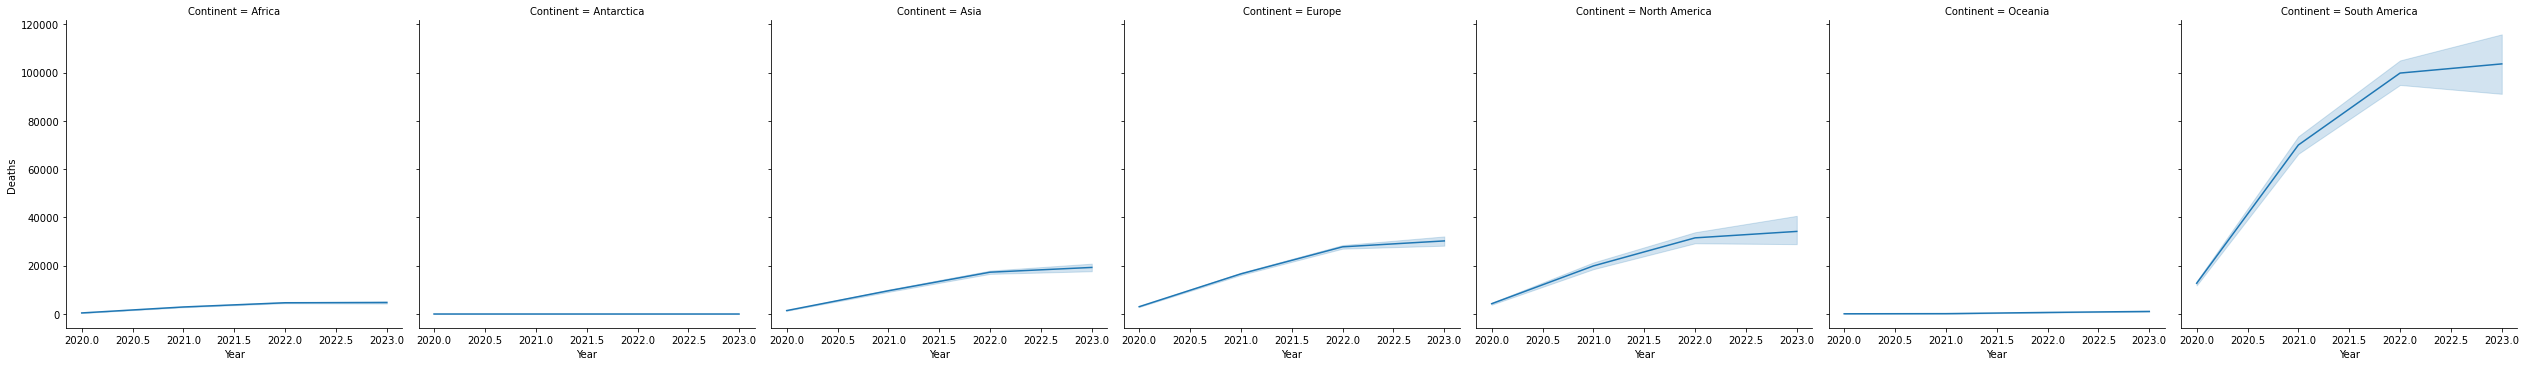

In [16]:
sns.relplot(x='Year', y='Deaths', col='Continent', kind='line', col_order=con_lin, data=confirmed)

Text(0.5, 1.1, 'Correlation between Confirmed Cases Vs Deaths by Continents')

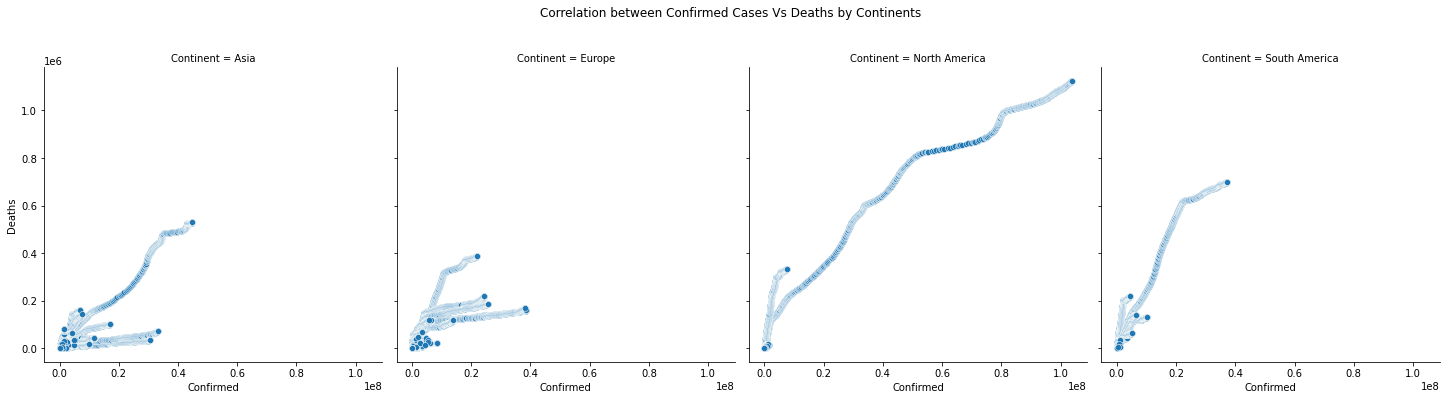

In [51]:
sns.relplot(x='Confirmed', y='Deaths', col='Continent', col_order=con, data=confirmed)
plt.suptitle('Correlation between Confirmed Cases Vs Deaths by Continents', y=1.1)

Text(0.5, 1.1, 'Correlation between Confirmed Cases Vs Deaths by Continents')

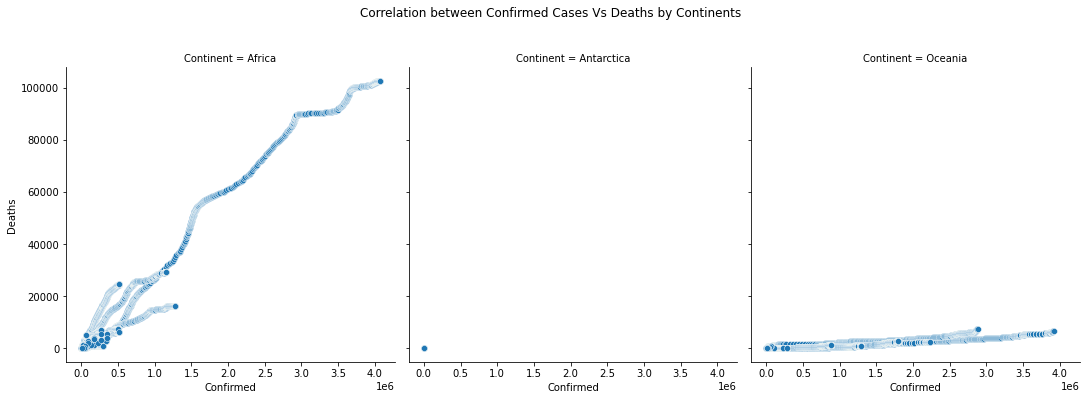

In [49]:
sns.relplot(x='Confirmed', y='Deaths', col='Continent', col_order=con_other, data=confirmed)
plt.suptitle('Correlation between Confirmed Cases Vs Deaths by Continents', y=1.1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Hong Kong'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Hubei'),
  Text(3, 0, 'Shanghai'),
  Text(4, 0, 'Jilin'),
  Text(5, 0, 'Guangdong'),
  Text(6, 0, 'Beijing'),
  Text(7, 0, 'Sichuan'),
  Text(8, 0, 'Henan'),
  Text(9, 0, 'Fujian'),
  Text(10, 0, 'Zhejiang'),
  Text(11, 0, 'Heilongjiang'),
  Text(12, 0, 'Hainan'),
  Text(13, 0, 'Shaanxi'),
  Text(14, 0, 'Chongqing'),
  Text(15, 0, 'Shandong'),
  Text(16, 0, 'Yunnan'),
  Text(17, 0, 'Inner Mongolia'),
  Text(18, 0, 'Jiangsu'),
  Text(19, 0, 'Hunan'),
  Text(20, 0, 'Guangxi'),
  Text(21, 0, 'Hebei'),
  Text(22, 0, 'Jiangxi'),
  Text(23, 0, 'Anhui'),
  Text(24, 0, 'Tianjin'),
  Text(25, 0, 'Xinjiang'),
  Text(26, 0, 'Liaoning'),
  Text(27, 0, 'Shanxi'),
  Text(28, 0, 'Gansu'),
  Text(29, 0, 'Macau'),
  Text(30, 0, 'Guizhou'),
  Text(31, 0, 'Tibet'),
  Text(32, 0, 'Ningxia'

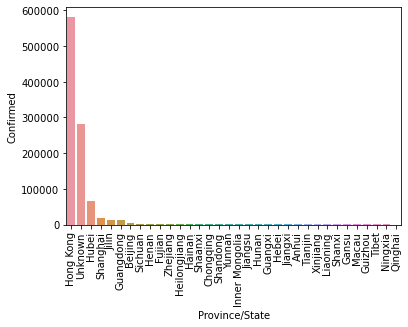

In [22]:
china = confirmed[confirmed['Country/Region']=='China']
china = china.groupby('Province/State')[['Confirmed', 'Deaths']].mean().sort_values(by='Confirmed', ascending=False)
sns.barplot(x=china.index, y='Confirmed', data=china)
plt.xticks(rotation=90)

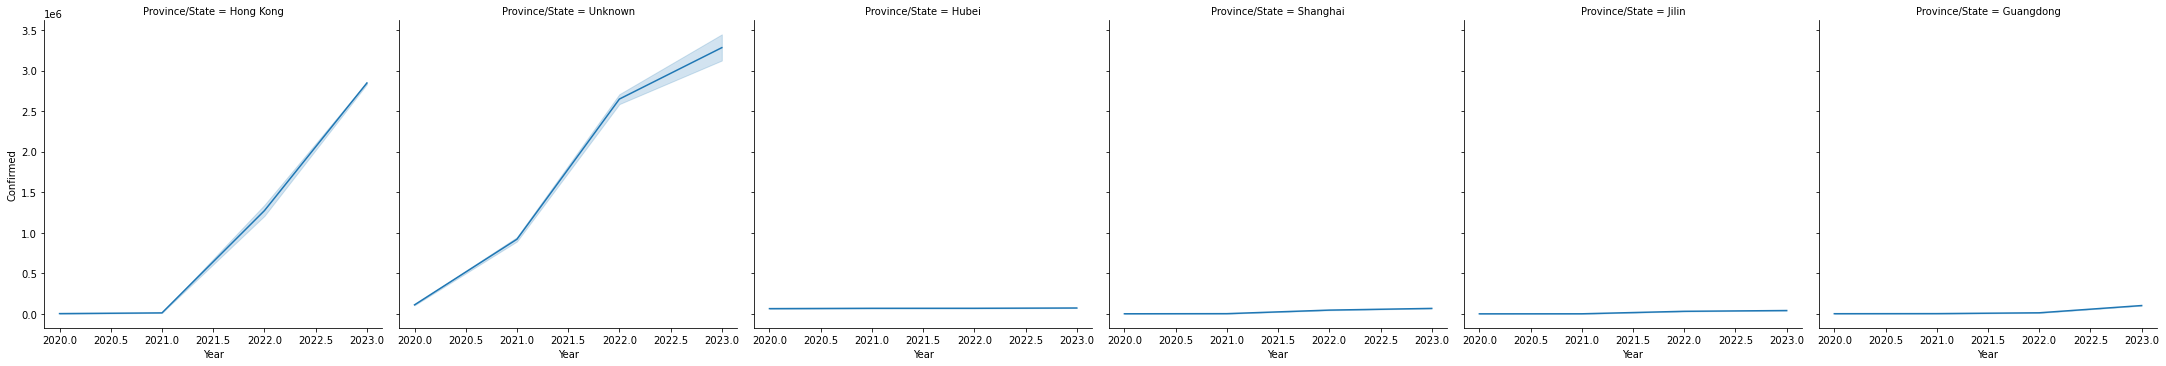

In [23]:
chi_t6 = ['Hong Kong', 'Unknown', 'Hubei', 'Shanghai', 'Jilin', 'Guangdong']
sns.relplot(x='Year', y='Confirmed', col='Province/State', kind='line', col_order=chi_t6, data=confirmed)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Hong Kong'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Hubei'),
  Text(3, 0, 'Shanghai'),
  Text(4, 0, 'Jilin'),
  Text(5, 0, 'Guangdong'),
  Text(6, 0, 'Beijing'),
  Text(7, 0, 'Sichuan'),
  Text(8, 0, 'Henan'),
  Text(9, 0, 'Fujian'),
  Text(10, 0, 'Zhejiang'),
  Text(11, 0, 'Heilongjiang'),
  Text(12, 0, 'Hainan'),
  Text(13, 0, 'Shaanxi'),
  Text(14, 0, 'Chongqing'),
  Text(15, 0, 'Shandong'),
  Text(16, 0, 'Yunnan'),
  Text(17, 0, 'Inner Mongolia'),
  Text(18, 0, 'Jiangsu'),
  Text(19, 0, 'Hunan'),
  Text(20, 0, 'Guangxi'),
  Text(21, 0, 'Hebei'),
  Text(22, 0, 'Jiangxi'),
  Text(23, 0, 'Anhui'),
  Text(24, 0, 'Tianjin'),
  Text(25, 0, 'Xinjiang'),
  Text(26, 0, 'Liaoning'),
  Text(27, 0, 'Shanxi'),
  Text(28, 0, 'Gansu'),
  Text(29, 0, 'Macau'),
  Text(30, 0, 'Guizhou'),
  Text(31, 0, 'Tibet'),
  Text(32, 0, 'Ningxia'

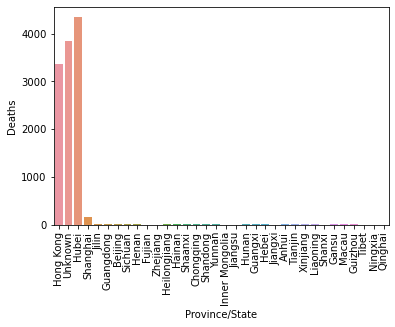

In [24]:
china = china.groupby('Province/State')[['Confirmed', 'Deaths']].mean().sort_values(by='Confirmed', ascending=False)
sns.barplot(x=china.index, y='Deaths', data=china)
plt.xticks(rotation=90)

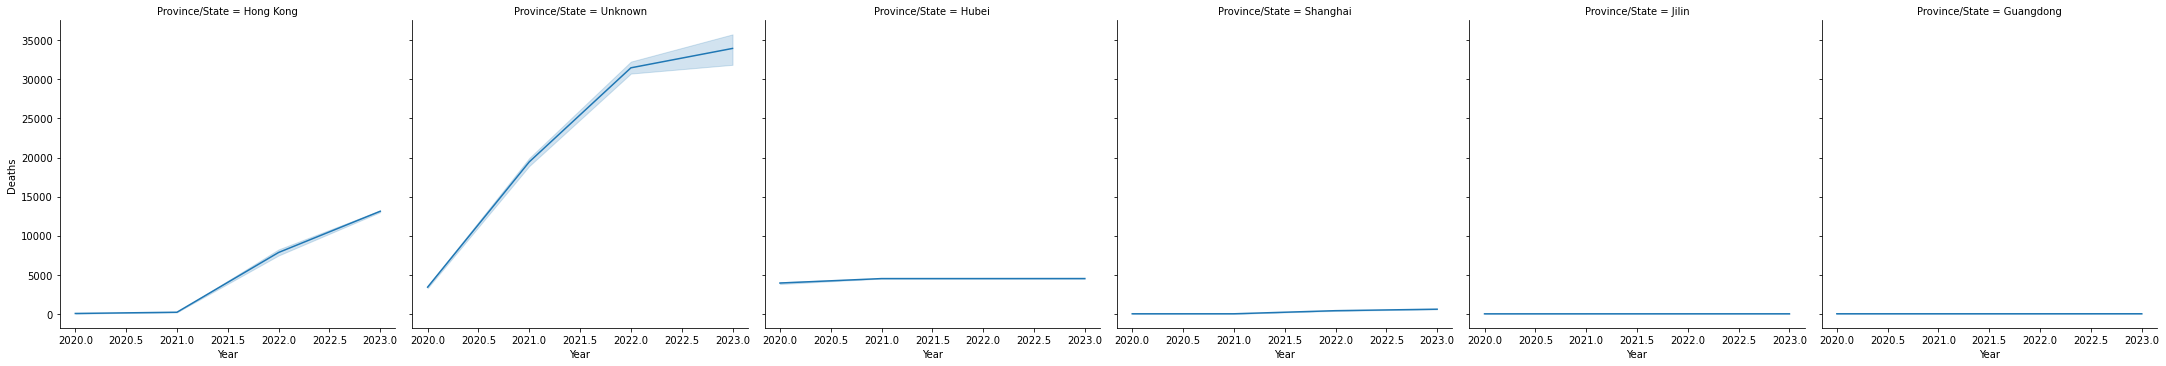

In [25]:
sns.relplot(x='Year', y='Deaths', col='Province/State', kind='line', col_order=chi_t6, data=confirmed)

# Modelling

The ARIMA model is a general class of mutiple models made up of three components AR-I-MA
- AR (Auto-Regressive): represented as p, it indicates the number of past values included in the AR model. This model (parameter) is set when the times series is stationary. i.e linearly regressed on its on past values.
- I (Integrated): represented as d, it indicates the number of times the series is differenced. if the time series is not stationary, it can be differenced to become stationary. i.e, compute the diferences between consecutive observations
- MA (Moving Average) represented as q, it indicates the number of past forecasterrors included in the MA model. This model (parameter) is also set to works on stationary time series. the difference here is that it is regressed on past forecast errors.

Rule of thumb for selecting either AR or MA models once time series stationality have been resolved
- If the PACF (Partial Autocorrelation) plot has a significant spike at lag p, but not beyond; the ACF plot decays more gradually. This may suggest an ARIMA(p,d,0) model. i.e the AR and I parameters of ARIMA model are set.
- If the ACF plot has a significant spike at the lag q, but not beyond; the PACF plot decays more gradually.This may suggest an ARIMA (0,d,q) model. i.e I and MA parameters of ARIMA model are set.

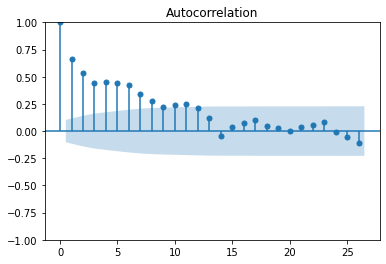
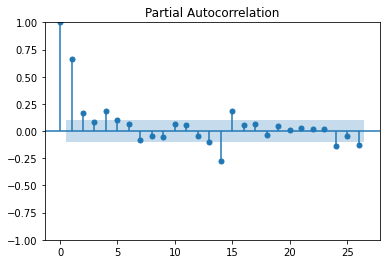

In [26]:
# Checking for the country with highest number of confirmed cases
group[group['Confirmed']==group['Confirmed'].max()]

,Continent,Country/Region,Confirmed,Deaths
175,North America,US,4.708065e+07,624564.492563


In [53]:
def subset(df, str):
    df_new = df[df['Country/Region']==str].reset_index(drop=True)
    return df_new

In [54]:
us_df = subset(confirmed, 'US')
us_df.tail()

,Province/State,Country/Region,Continent,Lat,Long,Date,Confirmed,Deaths,Day,Month,Year
1138,Unknown,US,North America,40.0,-100.0,2023-03-05,103646975,1122134,5,3,2023
1139,Unknown,US,North America,40.0,-100.0,2023-03-06,103655539,1122181,6,3,2023
1140,Unknown,US,North America,40.0,-100.0,2023-03-07,103690910,1122516,7,3,2023
1141,Unknown,US,North America,40.0,-100.0,2023-03-08,103755771,1123246,8,3,2023
1142,Unknown,US,North America,40.0,-100.0,2023-03-09,103802702,1123836,9,3,2023


# checking for stationarity of the time series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


<AxesSubplot:>

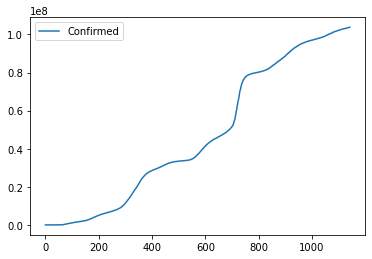

In [55]:
# Using the line plot

us = us_df[['Confirmed']]
us.info()
us[['Confirmed']].plot()

the trend line shows that the data is not stationary

In [56]:
# Using the ACF & PACF plot

In [57]:
# Splitting the data into train and test dataset
us_train = us['Confirmed'][:1000]
us_test = us['Confirmed'][1000:]

print(us_train.shape, us_test.shape)

(1000,) (143,)


In [58]:
us_train

0             1
1             1
2             2
3             2
4             5
         ...   
995    96888756
996    96915830
997    96921917
998    96928733
999    96967685
Name: Confirmed, Length: 1000, dtype: int64

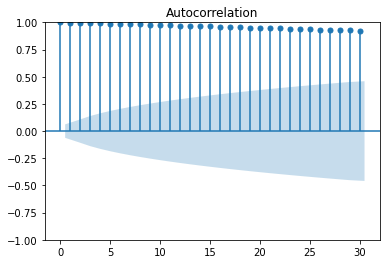

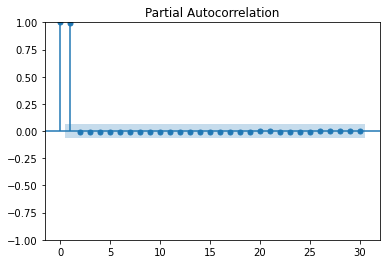

In [59]:
acf_original = plot_acf(us_train)

pacf_original = plot_pacf(us_train)

The ACF plot is plat all accross the lags, while the PACF plot has two strong lags at first then goes flat. These indicates that the data is not stationary

In [ ]:
# Using the ADF test 

In [60]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(us_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9896859771441271


This p-value is way hiegher than the standard 0.05 requirement. this also indicates that this data is not stationary

In [61]:
# scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scal_us = us.copy()
scaled_us = scaler.fit_transform(scal_us)
scaled_us = pd.DataFrame(scaled_us, columns=['Confirmed'])
scaled_us_train = scaled_us['Confirmed'][:1000]
scaled_us_test = scaled_us['Confirmed'][1000:]

In [ ]:
# Transforming to Stationary data and getting the AR-I-MA (p,d,q) parameters 

<AxesSubplot:>

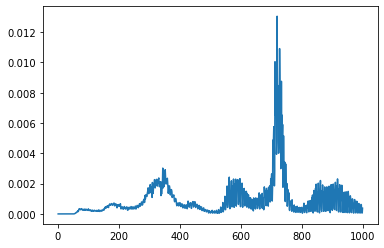

In [62]:
us_train_diff = scaled_us_train.diff().dropna()
us_train_diff.plot()

In [63]:
adf_test = adfuller(us_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.00035608217068980856


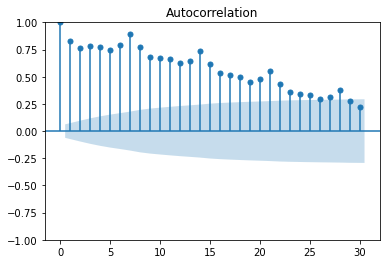

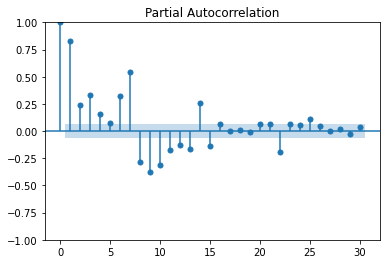

In [64]:
acf_original = plot_acf(us_train_diff)
pacf_original = plot_pacf(us_train_diff)

In [ ]:
We have the parameters (p,d,q) to be (8,1,0)

# Implementation using the ARIMA model

In [66]:
# training the model

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(scaled_us_train, order=(8,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                 1000
Model:                 ARIMA(8, 1, 0)   Log Likelihood                6199.804
Date:                Mon, 09 Oct 2023   AIC                         -12381.608
Time:                        15:17:45   BIC                         -12337.447
Sample:                             0   HQIC                        -12364.823
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4346      0.010     41.869      0.000       0.414       0.455
ar.L2          0.0302      0.012      2.536      0.011       0.007       0.053
ar.L3          0.0828      0.011      7.796      0.0

AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

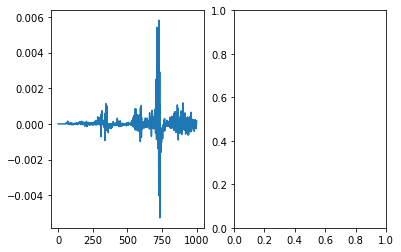

In [39]:
# making prediction

residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

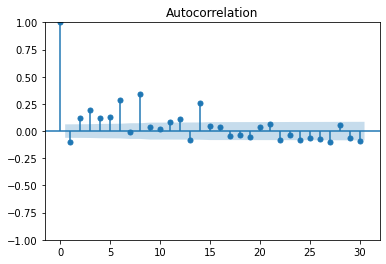

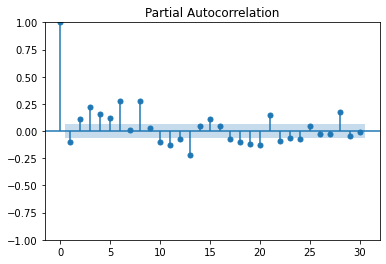

In [40]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

Text(0.5, 1.0, 'ARIMA Forecast/Prediction using the manual parameters')

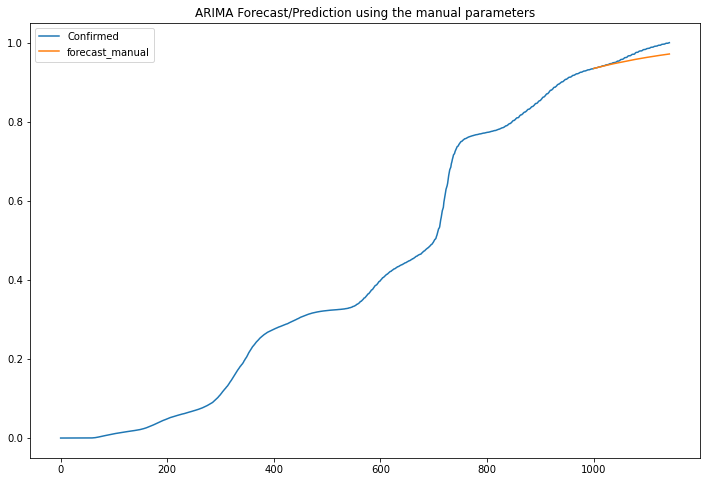

In [68]:
plt.rcParams['figure.figsize'] = (12,8)
forecast_test = model_fit.forecast(len(scaled_us_test))

scaled_us['forecast_manual'] = [None]*len(scaled_us_train) + list(forecast_test)
scaled_us.plot()
plt.title('ARIMA Forecast/Prediction using the manual parameters')

In [ ]:
# checking how the auto-fit ARIMA works

In [70]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [71]:
auto_arima = auto_arima(scaled_us_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 2, 0), scoring_args={}, suppress_warnings=True)

In [72]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(5, 2, 0)   Log Likelihood                5975.751
Date:                Mon, 09 Oct 2023   AIC                         -11937.503
Time:                        15:24:04   BIC                         -11903.163
Sample:                             0   HQIC                        -11924.450
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.21e-07   2.22e-05      0.005      0.996   -4.34e-05    4.36e-05
ar.L1         -0.5286      0.012    -43.110      0.000      -0.553      -0.505
ar.L2         -0.5598      0.014    -40.353      0.000      -0.587      -0.533
ar.L3         -0.3893      0.014    -28.069      0.000      -0.416      -0.362
ar.L4         -0.2630      0.014    -19.438      0.000      -0.290      -0.237
ar.L5         -0.3388      0.009    -36.632      0.000      -0.357      -0.321
sigma2      3.681e-07   4.97e-09     73.997      0.000    3.58e-07    3.78e-07
===================================================================================
Ljung-Box (L1) (Q):                  34.71   Jarque-Bera (JB):             41842.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              96.48   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'ARIMA Forecast/Prediction using the Auto parameters')

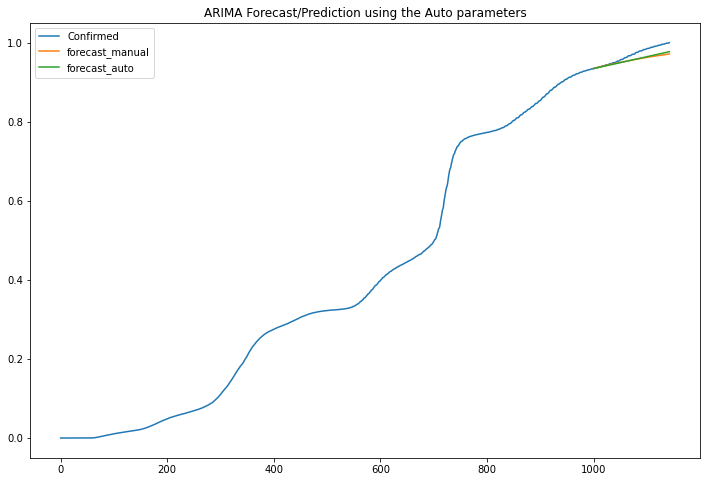

In [73]:
forecast_test_auto = auto_arima.predict(n_periods=len(scaled_us_test))
scaled_us['forecast_auto'] = [None]*len(scaled_us_train) + list(forecast_test_auto)

scaled_us.plot()
plt.title('ARIMA Forecast/Prediction using the Auto parameters')

In [47]:
true_arima_pred = scaler.inverse_transform(scaled_us)
true_arima_pred= pd.DataFrame(true_arima_pred)
true_arima_pred.columns = ['Confirmed', 'Forecast_Manual', 'Forecast_Auto']
true_arima_pred[999:]

,Confirmed,Forecast_Manual,Forecast_Auto
999,96967685.0,NaN,NaN
1000,97011349.0,9.702125e+07,9.700740e+07
1001,97072048.0,9.707445e+07,9.704636e+07
1002,97129478.0,9.712663e+07,9.707971e+07
1003,97175604.0,9.715652e+07,9.710746e+07
...,...,...,...
1138,103646975.0,1.007579e+08,1.013153e+08
1139,103655539.0,1.007774e+08,1.013468e+08
1140,103690910.0,1.007968e+08,1.013782e+08
1141,103755771.0,1.008161e+08,1.014097e+08


In [88]:
# evaluating the models prediction
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [49]:
mae = mean_absolute_error(scaled_us_test, forecast_test)
mape = mean_absolute_percentage_error(scaled_us_test, forecast_test)
rmse = np.sqrt(mean_squared_error(scaled_us_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.013106458561437263
mape - manual: 0.013322382629732244
rmse - manual: 0.016564120933946595


In [50]:
mae = mean_absolute_error(scaled_us_test, forecast_test_auto)
mape = mean_absolute_percentage_error(scaled_us_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(scaled_us_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 0.012261591768605216
mape - auto: 0.012488511523611228
rmse - auto: 0.014832534137594599


Our Auto-ARIMA model performs slightly better than the manual ARIMA process

In [ ]:
# Now predicting the cases for deaths

In [66]:
d_us = us_df[['Deaths']]
death_us = scaler.fit_transform(d_us)
scal_d_us = pd.DataFrame(death_us, columns=['Deaths'])
scal_d_us_train = scal_d_us['Deaths'][:1000]
scal_d_us_test = scal_d_us['Deaths'][1000:]

In [67]:
scal_d_us_test

1000    0.948303
1001    0.948935
1002    0.949473
1003    0.949990
1004    0.950010
          ...   
1138    0.998486
1139    0.998527
1140    0.998825
1141    0.999475
1142    1.000000
Name: Deaths, Length: 143, dtype: float64

<AxesSubplot:>

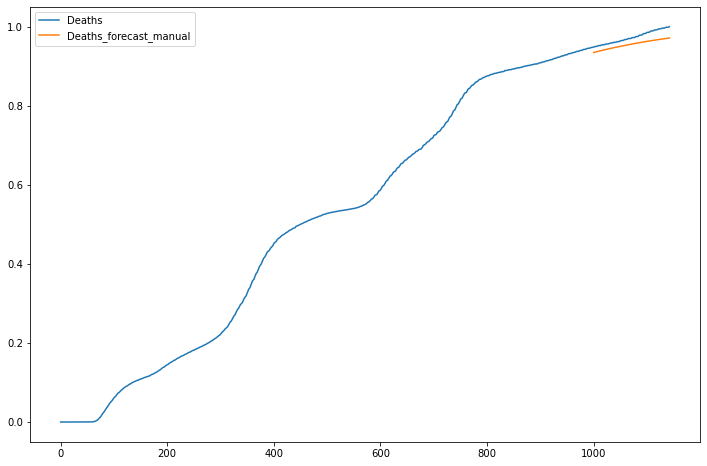

In [68]:
d_forecast_test = model_fit.forecast(len(scal_d_us_test))

scal_d_us['Deaths_forecast_manual'] = [None]*len(scal_d_us_train) + list(d_forecast_test)
scal_d_us.plot()

<AxesSubplot:>

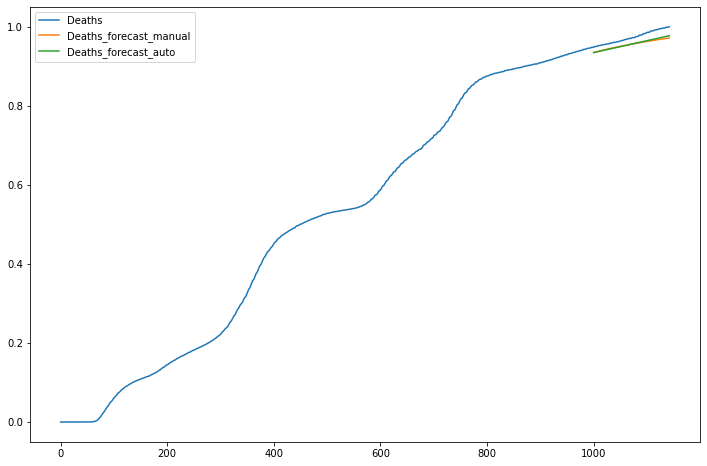

In [69]:
d_forecast_test_auto = auto_arima.predict(n_periods=len(scal_d_us_test))

scal_d_us['Deaths_forecast_auto'] = [None]*len(scal_d_us_train) + list(d_forecast_test_auto)
scal_d_us.plot()

In [71]:
mae = mean_absolute_error(scal_d_us_test, d_forecast_test)
mape = mean_absolute_percentage_error(scal_d_us_test, d_forecast_test)
rmse = np.sqrt(mean_squared_error(scal_d_us_test, d_forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')
print()

mae = mean_absolute_error(scal_d_us_test, d_forecast_test_auto)
mape = mean_absolute_percentage_error(scal_d_us_test, d_forecast_test_auto)
rmse = np.sqrt(mean_squared_error(scal_d_us_test, d_forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - manual: 0.01816717260242243
mape - manual: 0.018587991902703032
rmse - manual: 0.01896220529855989

mae - auto: 0.017324617917839947
mape - auto: 0.017752742543713684
rmse - auto: 0.017666995303892565


# Implementation using Linear Regression Model

In [74]:
new_df = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)
new_us = new_df[new_df['Country/Region']=='US']
new_us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1143 entries, 2020-01-22 to 2023-03-09
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  1143 non-null   object 
 1   Country/Region  1143 non-null   object 
 2   Continent       1143 non-null   object 
 3   Lat             1143 non-null   float64
 4   Long            1143 non-null   float64
 5   Confirmed       1143 non-null   int64  
 6   Deaths          1143 non-null   int64  
 7   Day             1143 non-null   int64  
 8   Month           1143 non-null   int64  
 9   Year            1143 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 98.2+ KB


In [75]:
lg_us = new_us.drop(['Province/State', 'Country/Region', 'Continent', 'Lat', 
                     'Long', 'Deaths', 'Day', 'Month', 'Year'],axis=1)

# adding input variables
lg_us['1_day_back'] = lg_us['Confirmed'].shift(+1)
lg_us['2_days_back'] = lg_us['Confirmed'].shift(+2)
lg_us['3_days_back'] = lg_us['Confirmed'].shift(+3)
lg_us['4_days_back'] = lg_us['Confirmed'].shift(+4)
lg_us['5_days_back'] = lg_us['Confirmed'].shift(+5)
lg_us = lg_us.fillna(0)
lg_us

,Confirmed,1_day_back,2_days_back,3_days_back,4_days_back,5_days_back
Date,,,,,,
2020-01-22,1,0.0,0.0,0.0,0.0,0.0
2020-01-23,1,1.0,0.0,0.0,0.0,0.0
2020-01-24,2,1.0,1.0,0.0,0.0,0.0
2020-01-25,2,2.0,1.0,1.0,0.0,0.0
2020-01-26,5,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...
2023-03-05,103646975,103650837.0,103648690.0,103589757.0,103533872.0,103443455.0
2023-03-06,103655539,103646975.0,103650837.0,103648690.0,103589757.0,103533872.0
2023-03-07,103690910,103655539.0,103646975.0,103650837.0,103648690.0,103589757.0


In [76]:
# splitting the data
lg_feature = scaler.fit_transform(lg_us.drop('Confirmed', axis=1).values)
lg_target = scaled_us['Confirmed'].values

X_train, X_test, y_train, y_test = lg_feature[:1000], lg_feature[1000:], lg_target[:1000], lg_target[1000:]

In [77]:
y_train.shape

(1000,)

In [78]:
# importing the packages
from sklearn.linear_model import LinearRegression

In [79]:
# fittig the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# making prediction
pred = linreg.predict(X_test)

In [80]:
graph = lg_us[['Confirmed']]
graph = scaler.fit_transform(graph)
graph = pd.DataFrame(graph, columns=['Confirmed'])

graph['Prediction'] = [None]*len(y_train) + list(pred)
graph

,Confirmed,Prediction
0,0.000000e+00,NaN
1,0.000000e+00,NaN
2,9.633661e-09,NaN
3,9.633661e-09,NaN
4,3.853464e-08,NaN
...,...,...
1138,9.984998e-01,0.998909
1139,9.985823e-01,0.998785
1140,9.989230e-01,0.998797
1141,9.995479e-01,0.999168


Text(0.5, 1.0, 'Linear Regression Model Forecast for Confirmed cases')

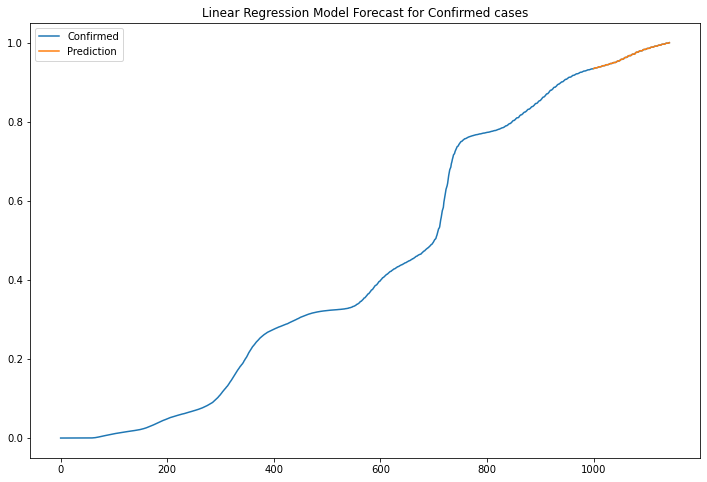

In [81]:
graph.plot()
plt.title('Linear Regression Model Forecast for Confirmed cases')

In [101]:
lg_mae = mean_absolute_error(pred, y_test)
lg_mape = mean_absolute_percentage_error(pred, y_test)
lg_rmse = np.sqrt(mean_squared_error(pred, y_test))

print(f'mae linear regression: {lg_mae}')
print(f'mape linear regression: {lg_mape}')
print(f'rmse linear regression: {lg_rmse}')

mae linear regression: 0.00036872279435814186
mape linear regression: 0.00038055197193779514
rmse linear regression: 0.0004484561521118223


In [ ]:
# Now predicting the cases for Deaths

In [82]:
lg_d_us = new_us.drop(['Province/State', 'Country/Region', 'Continent', 'Lat', 
                     'Long', 'Confirmed', 'Day', 'Month', 'Year'],axis=1)

# adding input variables
lg_d_us['1_day_back'] = lg_d_us['Deaths'].shift(+1)
lg_d_us['2_days_back'] = lg_d_us['Deaths'].shift(+2)
lg_d_us['3_days_back'] = lg_d_us['Deaths'].shift(+3)
lg_d_us['4_days_back'] = lg_d_us['Deaths'].shift(+4)
lg_d_us['5_days_back'] = lg_d_us['Deaths'].shift(+5)
lg_d_us = lg_d_us.fillna(0)
lg_d_us = pd.DataFrame(scaler.fit_transform(lg_d_us), columns=['Deaths', '1_day_back', '2_days_back', '3_days_back', '4_days_back', '5_days_back'])
lg_d_us

,Deaths,1_day_back,2_days_back,3_days_back,4_days_back,5_days_back
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
1138,0.998486,0.999044,0.999687,0.999534,0.998864,0.997991
1139,0.998527,0.999010,0.999694,0.999986,0.999542,0.998864
1140,0.998825,0.999052,0.999660,0.999992,0.999994,0.999542
1141,0.999475,0.999350,0.999702,0.999958,1.000000,0.999994


In [83]:
# splitting the data
lg_d_feature = lg_d_us.drop('Deaths', axis=1).values
lg_d_target = lg_d_us['Deaths'].values

X_d_train, X_d_test, y_d_train, y_d_test = lg_feature[:1000], lg_feature[1000:], lg_target[:1000], lg_target[1000:]

In [84]:
# fittig the model
linreg = LinearRegression()
linreg.fit(X_d_train, y_d_train)

# making prediction
d_pred = linreg.predict(X_d_test)

In [85]:
d_graph = lg_d_us[['Deaths']]
d_graph = pd.DataFrame(d_graph, columns=['Deaths'])

d_graph['Deaths_Prediction'] = [None]*len(y_d_train) + list(d_pred)
d_graph 

,Deaths,Deaths_Prediction
0,0.000000,NaN
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
...,...,...
1138,0.998486,0.998909
1139,0.998527,0.998785
1140,0.998825,0.998797
1141,0.999475,0.999168


<AxesSubplot:>

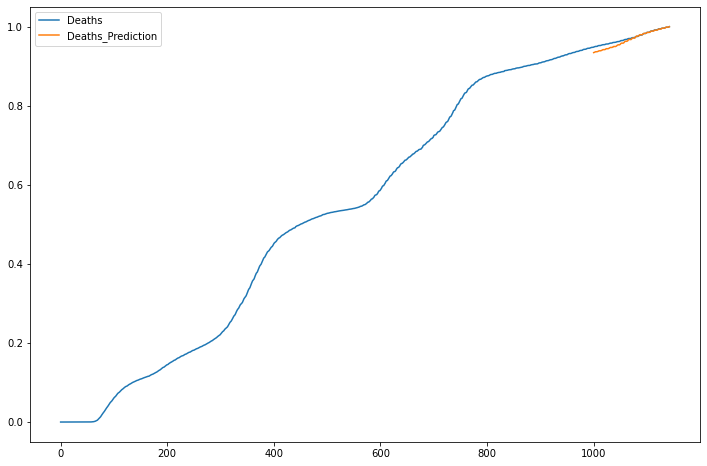

In [86]:
d_graph.plot()

# Cross Validating Both Model's Performance

In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [350]:
scaled_us['Confirmed']

,Confirmed,forecast_manual,forecast_auto
0,0.000000e+00,NaN,NaN
1,0.000000e+00,NaN,NaN
2,9.633661e-09,NaN,NaN
3,9.633661e-09,NaN,NaN
4,3.853464e-08,NaN,NaN
...,...,...,...
1138,9.984998e-01,0.970668,0.976037
1139,9.985823e-01,0.970855,0.976340
1140,9.989230e-01,0.971042,0.976644
1141,9.995479e-01,0.971228,0.976947


In [343]:
cv_scores_2 = cross_val_score(linreg, lg_feature, lg_target, cv=10)

linreg_score = np.mean(cv_scores_2)
linreg_score

0.9996161252928234